## First benchmark

To benchmark: estimating disassembly indexes for increasing levels of complex peptidomes


        

In [1]:
from disassembly.simulate_proteolysis import enzyme_set, enzyme, amino_acids


enzymes1 = enzyme_set(
    [
        enzyme({"K": 1}, "K protease"),
    ],
    [1],
    [1],
)

enzymes2 = enzyme_set(
    [
        enzyme({"K": 0.5, "R": 0.5}, "K+R protease"),
    ],
    [1],
    [1],
)


enzymes3 = enzyme_set(
    [
        enzyme({"V": 0.3, "I": 0.3, "A": 0.2, "T": 0.1}, "V+I+A+T protease"),
    ],
    [1],
    [1],
)

random = enzyme_set(
    [
        enzyme({aa: 1 / len(amino_acids) for aa in amino_acids.values()}, "random")],
    [1],
    [1],
)

In [2]:
protein = "MAHVRGLQLPGCLALAALCSLVHSQHVFLAPQQARSLLQRVRRANTFLEEVRKGNLERECVEETCSYEEAFEALESSTATDVFWAKYTACETARTPRDKLAACLEGNCAEGLGTNYRGHVNITRSGIECQLWRSRYPHKPEINSTTHPGADLQENFCRNPDSSTTGPWCYTTDPTVRRQECSIPVCGQDQVTVAMTPRSEGSSVNLSPPLEQCVPDRGQQYQGRLAVTTHGLPCLAWASAQAKALSKHQDFNSAVQLVENFCRNPDGDEEGVWCYVAGKPGDFGYCDLNYCEEAVEEETGDGLDEDSDRAIEGRTATSEYQTFFNPRTFGSGEADCGLRPLFEKKSLEDKTERELLESYIDGRIVEGSDAEIGMSPWQVMLFRKSPQELLCGASLISDRWVLTAAHCLLYPPWDKNFTENDLLVRIGKHSRTRYERNIEKISMLEKIYIHPRYNWRENLDRDIALMKLKKPVAFSDYIHPVCLPDRETAASLLQAGYKGRVTGWGNLKETWTANVGKGQPSVLQVVNLPIVERPVCKDSTRIRITDNMFCAGYKPDEGKRGDACEGDSGGPFVMKSPFNNRWYQMGIVSWGEGCDRDGKYGFYTHVFRLKKWIQKVIDQFGE"

In [3]:
from disassembly.simulate_proteolysis import simulate_proteolysis
from disassembly.estimate_weights import estimate_weights
from disassembly.disassembly import (
    get_disassembly,
    get_disassembly_indexes,
    get_disassembly_indexes_mc,
)

results = {}
test_names = ["simple", "medium", "complex", "random"]
iterations = 3
simulated_peptidomes = {}
simulated_graphs = {}
generated_graphs = {}

#Simulating peptidomes
for test_name, enzymes in zip(test_names, [enzymes1, enzymes2, enzymes3, random]):
    simulated_peptidomes[test_name] = {}
    simulated_graphs[test_name] = {}
    for iteration in range(iterations):
        print(f"Running {test_name} {iteration}")
        simulated_peptidome, simulated_graph = simulate_proteolysis(
            protein,
            enzymes,
            n_start=10,
            n_generate=1000,
            endo_or_exo_probability=[0.9, 0.1],
        )
        simulated_peptidomes[test_name][iteration] = simulated_peptidome
        simulated_graphs[test_name][iteration] = simulated_graph

#Running estimation
for test_name, enzymes in zip(test_names, [enzymes1, enzymes2, enzymes3, random]):
    results[test_name] = {}
    generated_graphs[test_name] = {}
    for iteration in range(iterations):
        results[test_name][iteration] = {}
        G, kls, generated, weights = estimate_weights(
            P=simulated_peptidomes[test_name][iteration],
            meta_enzyme=enzymes.meta_enzyme,
            exo_mult_factor=2,
            lr=1,
            n_iterations=1000,
            alpha=0.05,
        )
        generated_graphs[test_name][iteration] = G
        results[test_name][iteration]["kl"] = kls
        results[test_name][iteration]["rdi"] = get_disassembly_indexes(simulated_graphs[test_name][iteration])
        results[test_name][iteration]["rd"] = get_disassembly(
            simulated_peptidomes[test_name][iteration], results[test_name][iteration]["rdi"]
        )
        results[test_name][iteration]["edi"] = get_disassembly_indexes_mc(G, 10000)
        results[test_name][iteration]["ed"] = get_disassembly(
            simulated_peptidomes[test_name][iteration], results[test_name][iteration]["edi"]
        )

Running simple 0
 999 / 1000
209 unique peptides. 1010 total
Running simple 1
 999 / 1000
194 unique peptides. 1010 total
Running simple 2
 999 / 1000
172 unique peptides. 1010 total
Running medium 0
 999 / 1000
473 unique peptides. 1010 total
Running medium 1
 999 / 1000
484 unique peptides. 1010 total
Running medium 2
 999 / 1000
475 unique peptides. 1010 total
Running complex 0
 998 / 1000
613 unique peptides. 1010 total
Running complex 1
 999 / 1000
547 unique peptides. 1010 total
Running complex 2
 999 / 1000
613 unique peptides. 1010 total
Running random 0
 999 / 1000
859 unique peptides. 1010 total
Running random 1
 999 / 1000
882 unique peptides. 1010 total
Running random 2
 999 / 1000
886 unique peptides. 1010 total
 12 / 1000 | 0.25, mean: 0.54 | Decreasing | nz: 1549

/Users/erikhartman/dev/disassembly/.venv/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/erikhartman/dev/disassembly/.venv/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/erikhartman/dev/disassembly/.venv/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/erikhartman/dev/disassembly/.venv/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/erikhartman/dev/disassembly/.venv/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


 99 / 1000 | 0.01, mean: 0.01 | Plateau | nz: 1327321
Learning rate decreased to 0.5
 208 / 209 | checking 1 pathss | Plateau | nz: 1326
 Averaged DI: 2.79

 Averaged DI: 3.50
 99 / 1000 | 0.00, mean: 0.01 | Plateau | nz: 1295268
Learning rate decreased to 0.5
 193 / 194 | checking 8 pathshs| Plateau | nz: 1319
 Averaged DI: 2.87

 Averaged DI: 3.49
 171 / 172 | checking 2 pathsss Plateau | nz: 1215211
 Averaged DI: 2.85

 Averaged DI: 3.33
 132 / 1000 | 0.02, mean: 0.03 | Plateau | nz: 4062066
Learning rate decreased to 0.5
 201 / 1000 | 0.01, mean: 0.01 | Plateau | nz: 4207

TypeError: 'str' object is not callable

/var/folders/64/ytcycnwx6w936vfxs5_7q3hm0000gn/T/ipykernel_48714/596015100.py:33: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  a, _, _, _ = np.linalg.lstsq(x, e_di)


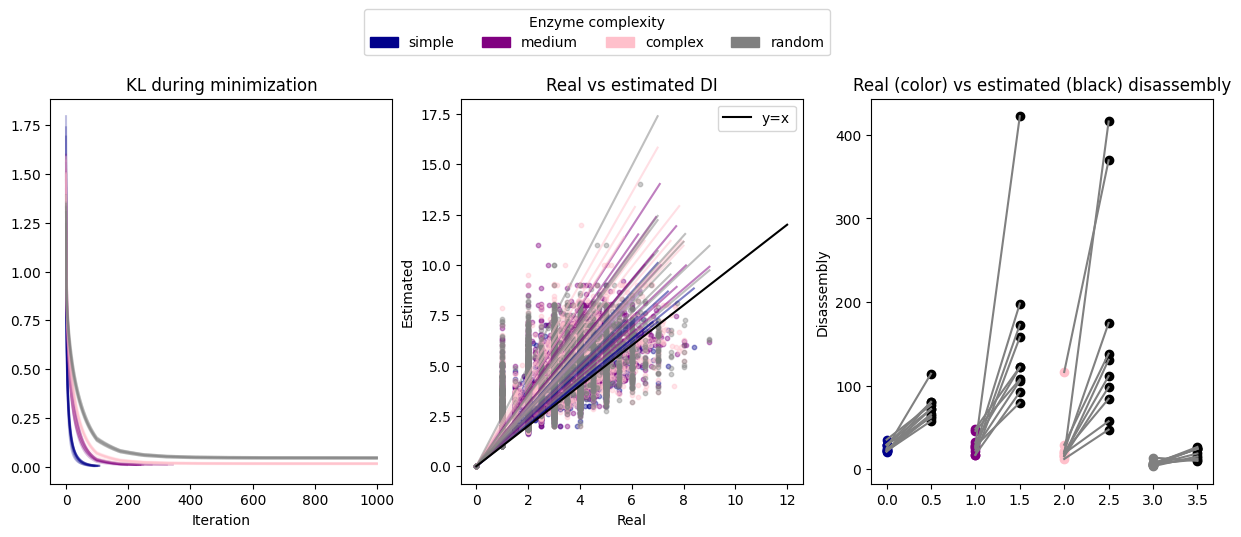

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from disassembly.util import get_nrmse

# Plotting KL-div
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
colors = ["darkblue", "purple", "pink", "gray"]

for i, test_name in enumerate(test_names):
    for iteration in range(iterations):
        axs[0].plot(
            results[test_name][iteration]["kl"],
            label=test_name,
            c=colors[i],
            alpha=0.25,
        )

# plotting corr DI
nrmse = {}
for i, test_name in enumerate(test_names):
    nrmse[test_name] = {}
    for iteration in range(iterations):
        real_di = results[test_name][iteration]["rdi"]
        estimated_di = results[test_name][iteration]["edi"]

        r_di = []
        e_di = []
        for sequence in real_di.keys():
            r_di.append(real_di[sequence])
            e_di.append(estimated_di[sequence])

        regress = linregress(e_di, r_di)

        axs[1].plot(
            np.linspace(0, max(e_di)),
            regress.intercept + np.linspace(0, max(e_di)) * regress.slope,
            label="fitted line",
        )
        axs[1].scatter(r_di, e_di, c=colors[i], alpha=0.4, s=10)
        nrmse[test_name][iteration] = get_nrmse(r_di, e_di)

axs[1].plot(np.linspace(0, 12, 100), np.linspace(0, 12, 100), "black", label="y=x")
axs[1].legend()

# plotting real vs estimated disassembly
for i, test_name in enumerate(test_names):
    for iteration in range(iterations):
        real_d = results[test_name][iteration]["rd"]
        estimated_d = results[test_name][iteration]["ed"]

        axs[2].scatter(test_names.index(test_name), real_d, color=colors[i])
        axs[2].scatter(
            test_names.index(test_name) + 0.5,
            estimated_d,
            color="black",
        )
        axs[2].plot(
            [test_names.index(test_name), test_names.index(test_name) + 0.5],
            [real_d, estimated_d],
            color="gray",
        )

#axs[2].set_yscale("log")

axs[0].set_title("KL during minimization")
axs[0].set_xlabel("Iteration")
axs[1].set_title("Real vs estimated DI")
axs[1].set_xlabel("Real")
axs[1].set_ylabel("Estimated")
axs[2].set_title("Real (color) vs estimated (black) disassembly")
axs[2].set_ylabel("Disassembly")

import matplotlib.patches as mpatches

patches = []
for test_name, color in zip(test_names, colors):
    patches.append(mpatches.Patch(color=color, label=test_name))

plt.legend(
    handles=patches,
    bbox_to_anchor=(-0.1, 1.25),
    ncol=4,
    title="Enzyme complexity",
)

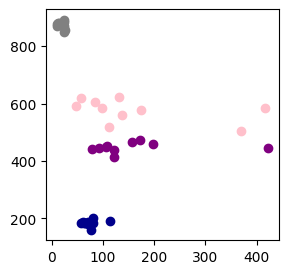

In [ ]:
fig = plt.figure(figsize=(3,3))
for i, test_name in enumerate(test_names):
    for iteration in range(iterations):
        edi = results[test_name][iteration]["ed"]
        n_pep = len(simulated_peptidomes[test_name][iteration].keys())
        plt.scatter(edi, n_pep, c=colors[test_names.index(test_name)])

# Gradient descent

In [ ]:
from disassembly.estimate_weights_gd import estimate_weights

for test_name, enzymes in zip(test_names, [enzymes1, enzymes2, enzymes3, random]):
    results[test_name] = {}
    generated_graphs[test_name] = {}
    for iteration in range(iterations):
        print(test_name, iteration)
        results[test_name][iteration] = {}
        G, kls, generated, weights = estimate_weights(
            true_dict=simulated_peptidomes[test_name][iteration],
            lr=0.001,
            n_iterations=500,

        )
        generated_graphs[test_name][iteration] = G
        results[test_name][iteration]["kl"] = kls
        results[test_name][iteration]["rdi"] = get_disassembly_indexes(simulated_graphs[test_name][iteration])
        results[test_name][iteration]["rd"] = get_disassembly(
            simulated_peptidomes[test_name][iteration], results[test_name][iteration]["rdi"]
        )
        results[test_name][iteration]["edi"] = get_disassembly_indexes_mc(G, 20000)

        results[test_name][iteration]["ed"] = get_disassembly(
            simulated_peptidomes[test_name][iteration], results[test_name][iteration]["edi"]
        )

 99 / 500 | 0.55, mean: 1.24 | Stochastic | nz: 1429
Learning rate decreased to 0.0005
 346 / 500 | 0.60, mean: 0.35 | Increasing | nz: 1353
Learning rate decreased to 0.00025
 159 / 160 | checking 4 pathshs Plateau | nz: 1431416
 Averaged DI: 2.99

 Averaged DI: 2.91
 99 / 500 | 0.83, mean: 1.15 | Increasing | nz: 12264
Learning rate decreased to 0.0005
 258 / 500 | 0.73, mean: 0.67 | Stochastic | nz: 13599
Learning rate decreased to 0.00025
 180 / 181 | checking 2 pathsss Plateau | nz: 1307343
 Averaged DI: 2.90

 Averaged DI: 2.81
 99 / 500 | 0.56, mean: 0.73 | Stochastic | nz: 16382
Learning rate decreased to 0.0005
 321 / 500 | 0.99, mean: 0.43 | Increasing | nz: 15231
Learning rate decreased to 0.00025
 182 / 183 | checking 27 pathss Plateau | nz: 1632612
 Averaged DI: 2.71

 Averaged DI: 3.16
 99 / 500 | 0.82, mean: 1.50 | Stochastic | nz: 15356
Learning rate decreased to 0.0005
 255 / 500 | 1.74, mean: 1.67 | Increasing | nz: 1364
Learning rate decreased to 0.00025
 461 / 500 |

/Users/erikhartman/dev/disassembly/src/disassembly/disassembly.py:99: RuntimeWarning: invalid value encountered in scalar divide
  weights = [w / sum_weights for w in weights]


ValueError: probabilities contain NaN

/var/folders/64/ytcycnwx6w936vfxs5_7q3hm0000gn/T/ipykernel_48714/3867980253.py:41: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  a, _, _, _ = np.linalg.lstsq(x, e_di)


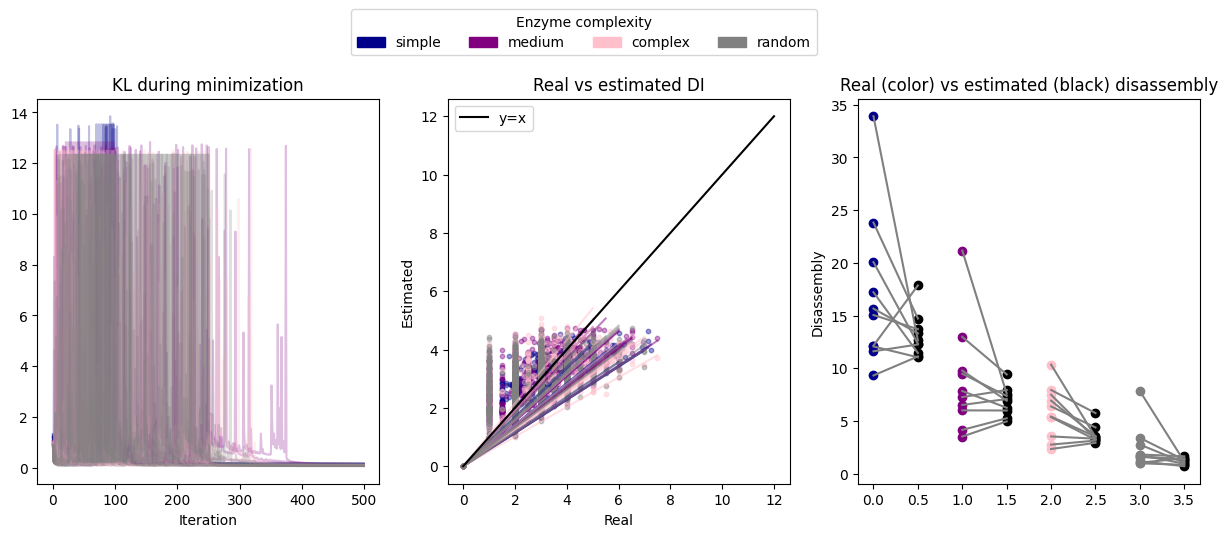

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def get_nrmse(true, observed):
    true = np.array(true)
    observed = np.array(observed)
    rmse = np.sqrt(np.mean((true - observed) ** 2))
    nrmse = rmse / np.mean(true)
    return nrmse


# Plotting KL-div
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
colors = ["darkblue", "purple", "pink", "gray"]

for i, test_name in enumerate(test_names):
    for iteration in range(iterations):
        axs[0].plot(
            results[test_name][iteration]["kl"],
            label=test_name,
            c=colors[i],
            alpha=0.25,
        )

# plotting corr DI
nrmse = {}
for i, test_name in enumerate(test_names):
    nrmse[test_name] = {}
    for iteration in range(iterations):
        real_di = results[test_name][iteration]["rdi"]
        estimated_di = results[test_name][iteration]["edi"]

        r_di = []
        e_di = []
        for sequence in real_di.keys():
            r_di.append(real_di[sequence])
            e_di.append(estimated_di[sequence])

        regress = linregress(e_di, r_di)

        axs[1].plot(
            np.linspace(0, max(e_di)),
            regress.intercept + np.linspace(0, max(e_di)) * regress.slope,
            label="fitted line",
        )

        axs[1].scatter(r_di, e_di, c=colors[i], alpha=0.4, s=10)
        nrmse[test_name][iteration] = get_nrmse(r_di, e_di)

axs[1].plot(np.linspace(0, 12, 100), np.linspace(0, 12, 100), "black", label="y=x")
axs[1].legend()

# plotting real vs estimated disassembly
for i, test_name in enumerate(test_names):
    for iteration in range(iterations):
        real_d = results[test_name][iteration]["rd"]
        estimated_d = results[test_name][iteration]["ed"]

        axs[2].scatter(test_names.index(test_name), real_d, color=colors[i])
        axs[2].scatter(
            test_names.index(test_name) + 0.5,
            estimated_d,
            color="black",
        )
        axs[2].plot(
            [test_names.index(test_name), test_names.index(test_name) + 0.5],
            [real_d, estimated_d],
            color="gray",
        )

#axs[2].set_yscale("log")

axs[0].set_title("KL during minimization")
axs[0].set_xlabel("Iteration")
axs[1].set_title("Real vs estimated DI")
axs[1].set_xlabel("Real")
axs[1].set_ylabel("Estimated")
axs[2].set_title("Real (color) vs estimated (black) disassembly")
axs[2].set_ylabel("Disassembly")

import matplotlib.patches as mpatches

patches = []
for test_name, color in zip(test_names, colors):
    patches.append(mpatches.Patch(color=color, label=test_name))

plt.legend(
    handles=patches,
    bbox_to_anchor=(-0.1, 1.25),
    ncol=4,
    title="Enzyme complexity",
)

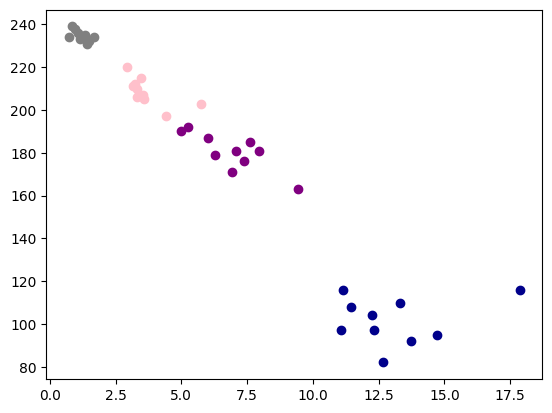

In [ ]:
fig = plt.figure(figsize=(3,3))
for i, test_name in enumerate(test_names):
    for iteration in range(iterations):
        edi = results[test_name][iteration]["ed"]
        n_pep = len(simulated_peptidomes[test_name][iteration].keys())
        plt.scatter(edi, n_pep, c=colors[test_names.index(test_name)])

# Peptidomes

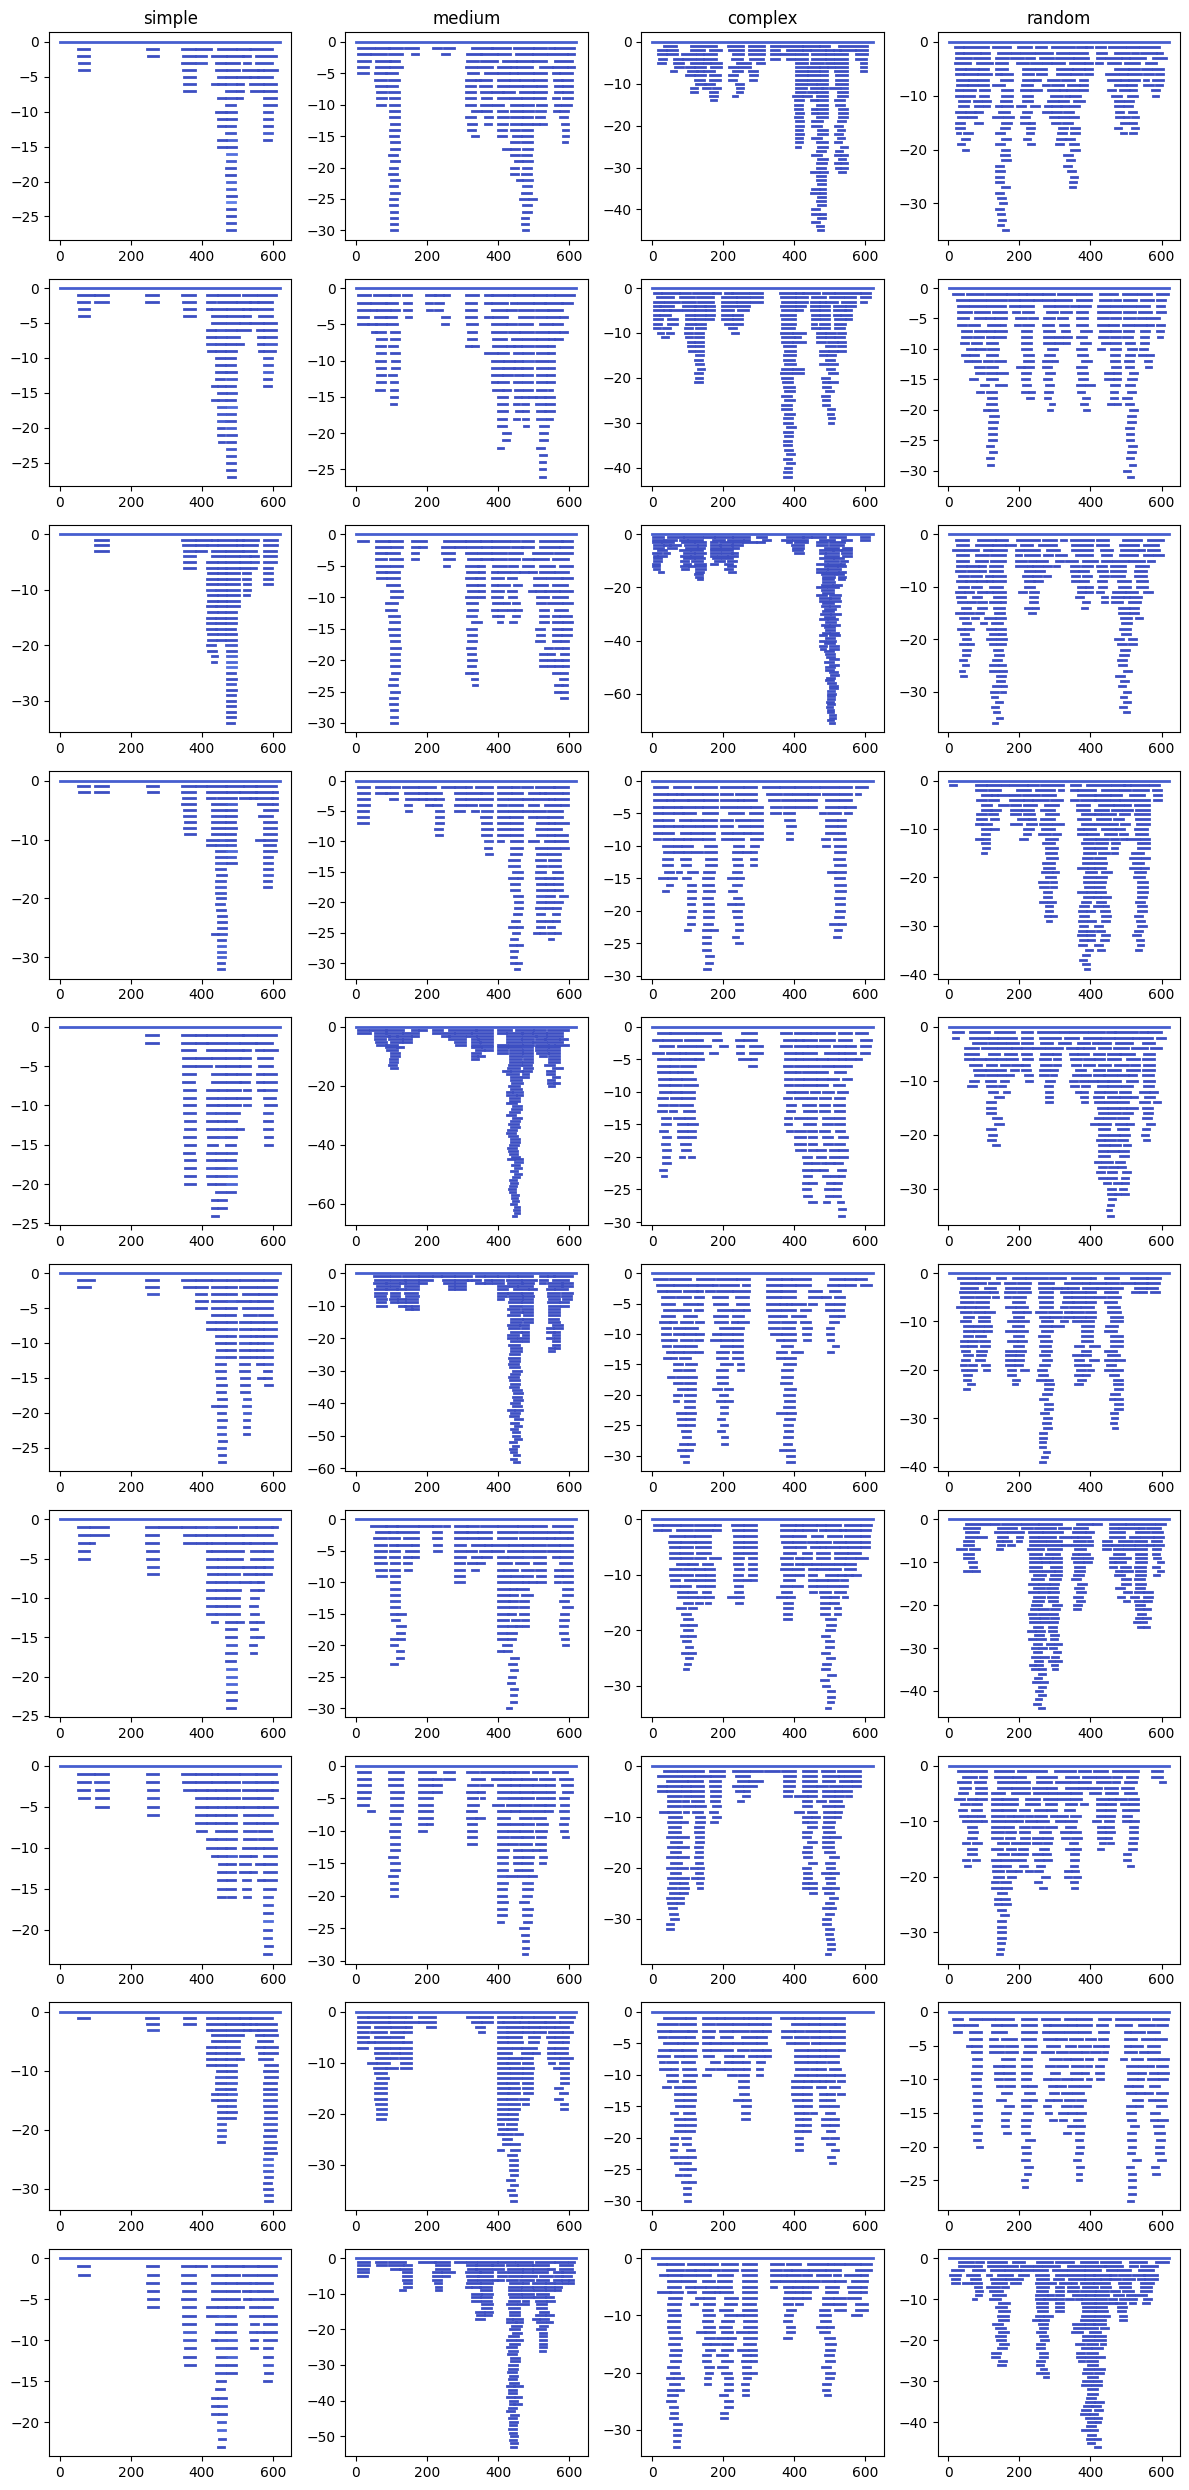

In [ ]:
from disassembly.util import plot_peptidome

fig, axs = plt.subplots(
    iterations, len(test_names), figsize=(len(test_names) * 3, iterations * 2.5)
)
for iteration in range(iterations):
    for test_name in test_names:
        ax = axs[iteration, test_names.index(test_name)]
        if iteration == 0:
            ax.set_title(test_name)
        plot_peptidome(protein, simulated_peptidomes[test_name][iteration], ax)
plt.tight_layout()